# eMoney

In this notebook, we will address data segmentation using advanced analysis and modeling techniques. Segmentation will be useful to identify patterns and structures in the data set, allowing for a deeper understanding of current customer portfolio segments. This process will not only optimize decision making by revealing key insights, but will also facilitate the customization of strategies and the improvement of accuracy in the predictive model.

To achieve this, we transformed data (One-Hot Encoding and StandardScaler) and will follow 2 steps:

- Elbow Method
- Data Clustering

By: Andrea López

## 1. Elbow method

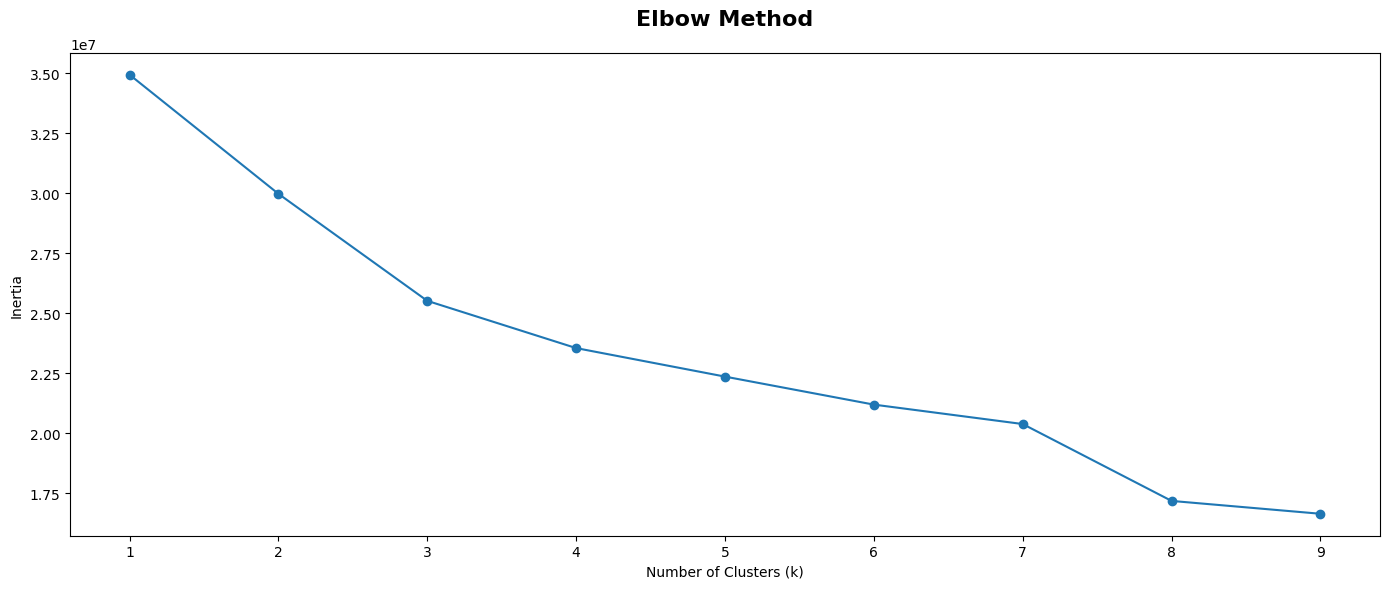

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store inertia:
inertia = []

# Defining the range of number of clusters we want to test:
k_range = range(1, 10)

# Applying KMeans to each k value:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)  # Saving the inertia

# Plotting the elbow method:
plt.figure(figsize=(14, 6))
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Adjusting layout to prevent overlap:
plt.tight_layout()
plt.show()

**Conclusions**

In the elbow method plot above, the "elbow" appears to be in 3 clusters. This is observed because, starting from 3, the decrease in inertia becomes less pronounced.That is, adding more clusters does not significantly improve the compaction of the groups.

Therefore, 3 clusters would be the most optimal number according to the elbow method.

## 2. Data Clustering

In [ ]:
from sklearn.cluster import KMeans

# Specifying number of clusters:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model to the transformed data:
kmeans.fit(df)

# Assigning clusters to each row in the DataFrame:
df["cluster"] = kmeans.labels_

# Verifying output:
print(f"Displaying first 5 entries with clusters:")
df.head()

Displaying first 5 entries with clusters:


,customer_id,month_partition,entry_channel,active_in_app,segment,short_term_deposit,loans,mortgage,funds,securities,...,product_id,net_margin,product_desc,family_product,region_name,entry_year,entry_month,monthsale_year,monthsale_month,cluster
0,16063,2018-11-01,KAT,1,03 - UNIVERSITY,0,0,0,0,0,...,9999.0,67.8,unknown,unknown,Madrid,2018,11,2018,10,2
1,16063,2018-12-01,KAT,1,02 - INDIVIDUALS,0,0,0,0,0,...,9999.0,68.7,unknown,unknown,Madrid,2018,11,2018,10,2
2,16063,2019-01-01,KAT,1,02 - INDIVIDUALS,0,0,0,0,0,...,9999.0,68.7,unknown,unknown,Madrid,2018,11,2018,10,2
3,16063,2019-02-01,KAT,1,02 - INDIVIDUALS,0,0,0,0,0,...,9999.0,68.7,unknown,unknown,Madrid,2018,11,2018,10,2
4,16063,2019-03-01,KAT,0,02 - INDIVIDUALS,0,0,0,0,0,...,9999.0,68.7,unknown,unknown,Madrid,2018,11,2018,10,2


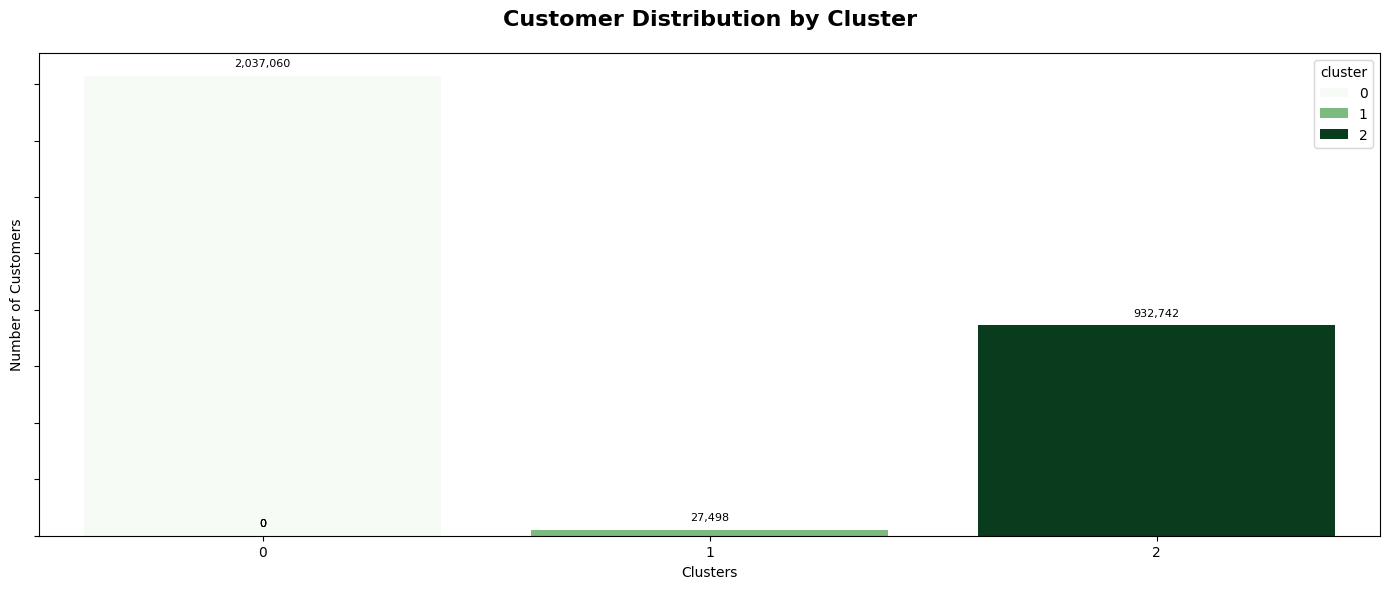

In [ ]:
# Plotting cluster distribution:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="cluster", hue="cluster", data=df, palette="Greens")
plt.title("Customer Distribution by Cluster", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Clusters")
plt.ylabel("Number of Customers")

# Adding the total number of customers above each bar with a smaller font size:
for p in ax.patches:
    ax.annotate(format(p.get_height(), ",.0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = "center", va = "center", 
                xytext = (0, 9), 
                textcoords = "offset points",
                fontsize=8)

# Hiding the y-axis values ​​but keeping the title:
ax.set_yticklabels([])

# Adjusting layout to prevent overlap:
plt.tight_layout()
plt.show()

In [ ]:
# Grouping by cluster and calculating mean value of numeric columns:
cluster_summary = df.groupby("cluster")[numeric_cols].mean()

# Displaying output:
pd.set_option("display.max_columns", None)
print(cluster_summary)

          customer_id  active_in_app  short_term_deposit     loans  mortgage  \
cluster                                                                        
0        1.236111e+06       0.268156            0.000108  0.000025  0.000000   
1        1.413805e+06       0.932286            0.000000  0.000182  0.000145   
2        1.228054e+06       0.694130            0.008703  0.000213  0.000163   

            funds  securities  long_term_deposit  credit_card   payroll  \
cluster                                                                   
0        0.000265    0.000395           0.000600     0.001377  0.011036   
1        0.006400    0.014874           0.028148     0.034912  0.325806   
2        0.010476    0.010363           0.051795     0.035639  0.093640   

         pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
cluster                                                                         
0            0.011429         0.019966     0.006217    0.0312

In [ ]:
# Applied same strategy for object columns.

        month_partition entry_channel           segment country_id  \
cluster                                                              
0            2018-12-01           KHE   03 - UNIVERSITY         ES   
1            2019-01-01           KHE  02 - INDIVIDUALS         ES   
2            2019-05-01           KFC  02 - INDIVIDUALS         ES   

        region_code   sale_id product_desc family_product region_name  
cluster                                                                
0            Others   unknown      unknown        unknown      Others  
1            Others  100004.0    em_acount        account      Others  
2            Others   unknown      unknown        unknown      Others  


Based on key columns, we will define the name of each segment capturing the essence of each group. The names will be based on customer profile, products purchased, and financial behavior. While the detailed results and final output are **not publicly available**, the same analysis, description, and business interpretation strategy were applied consistently across all clusters.

- **CLUSTER 0 - Young Initial Savers**: 
    - Activity in the app: Moderate-low (0.268). Customers in this cluster are not very active in the banking application.
    - Financial products: They show low levels of both types of deposits, and little participation in financial products (loans, mortgages, and investment funds).
    - Credits: Very low (0.000025), and without mortgages or notable investments.
    - Funds and other products: Almost non-existent.
    - Credit and debit cards: Very low use of credit cards (0.001377), but have some use of debit cards (0.031).
    - Pension and payroll: Low participation in both products (0.011).
    - Demographics: Very young group (23.65 years) and with a salary slightly above the average (97.950€).
    - Time with the bank: Users in this cluster have been customers since around 2016, with relatively recent tenure.
    - Entry channel: Customers entered through the KHE channel.
    - Segment: They belong to the "03 - UNIVERSITY" segment. They are university students or customers in the higher education stage.
    - Country and region: They reside in Spain (ES) and in the Others region (probably areas outside of large cities or specific regions).
    - Summary: This group is mainly composed of university students who joined the bank in December 2018, probably with basic or not yet defined products, and who live in less centralized areas.
    - **Profile**: Young adults who live in less centralized areas with little interest in complex financial products and limited participation in banking products.

**Business Interpretation**

- **Cluster 0**: Customers with low engagement that require adquisition and education strategies, to whom the company could offer basic, accesible, digitally and low-risk products.